In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
full_data = pd.read_csv("/heart.csv")

In [5]:
# Creating function for outlier check
def outlier_check(var):
    sns.displot(data = full_data, x = var)
    print('Variable: ', var) 
    print('Minimum value: ', full_data[var].min())
    print('1st percentile: ', full_data[var].quantile(0.01))
    print('99th percentile: ', full_data[var].quantile(0.99))
    print('Maximum value: ', full_data[var].max())

# Outlier treatment, sets minimum value to 1st percentile or maximum value to 99th percentile.
def outlier_treatment(var, min_treat, max_treat):
    min = full_data[var].quantile(0.01)
    max = full_data[var].quantile(0.99)
    if min_treat == 1:
        full_data.loc[full_data[var] <= min, var] =  min
    if max_treat == 1:
        full_data.loc[full_data[var] >= max, var] =  max


In [1]:
outlier_check('age')
outlier_treatment('age', min_treat = 1, max_treat = 0)

NameError: name 'outlier_check' is not defined

In [2]:
outlier_check('trtbps')
outlier_treatment('trtbps', min_treat = 1, max_treat = 1)

NameError: name 'outlier_check' is not defined

In [3]:
outlier_check('chol')
outlier_treatment('chol', min_treat = 0, max_treat = 1)

NameError: name 'outlier_check' is not defined

Variable:  thalachh
Minimum value:  71
1st percentile:  95.02
99th percentile:  191.96000000000004
Maximum value:  202


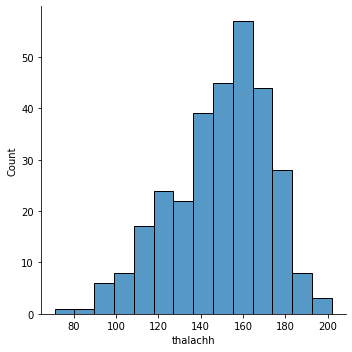

In [9]:
outlier_check('thalachh')
outlier_treatment('thalachh', min_treat = 1, max_treat = 0)

Variable:  oldpeak
Minimum value:  0.0
1st percentile:  0.0
99th percentile:  4.2
Maximum value:  6.2


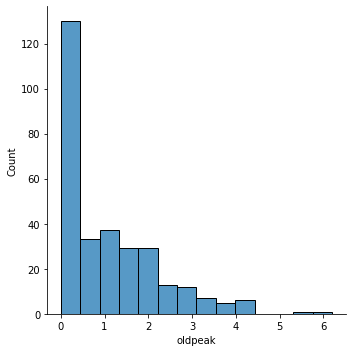

In [10]:
outlier_check('oldpeak')
outlier_treatment('oldpeak', min_treat = 0, max_treat = 1)

   Count  Percentage
1    165       54.46
0    138       45.54


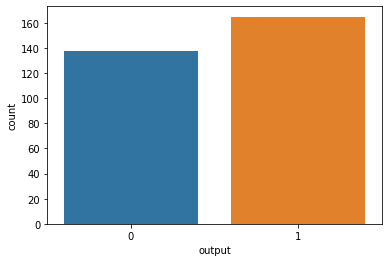

In [11]:
sns.countplot(full_data['output'])
print(pd.concat( [full_data['output'].value_counts(),
                  full_data['output'].value_counts(normalize=True).mul(100).round(2)],
                 axis = 1,
                 keys = ('Count', 'Percentage')))

In [13]:
low_corr_vars = ['restecg', 'fbs', 'chol', 'trtbps']
full_data.drop(low_corr_vars, axis = 1, inplace = True)
full_data.head()

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1,3,150.0,0,2.3,0,0,1,1
1,37.0,1,2,187.0,0,3.5,0,0,2,1
2,41.0,0,1,172.0,0,1.4,2,0,2,1
3,56.0,1,1,178.0,0,0.8,2,0,2,1
4,57.0,0,0,163.0,1,0.6,2,0,2,1


In [14]:
full_data =pd.get_dummies(full_data, columns = ['cp', 'caa', 'thall'], drop_first = True)
full_data.head()

,age,sex,thalachh,exng,oldpeak,slp,output,cp_1,cp_2,cp_3,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63.0,1,150.0,0,2.3,0,1,0,0,1,0,0,0,0,1,0,0
1,37.0,1,187.0,0,3.5,0,1,0,1,0,0,0,0,0,0,1,0
2,41.0,0,172.0,0,1.4,2,1,1,0,0,0,0,0,0,0,1,0
3,56.0,1,178.0,0,0.8,2,1,1,0,0,0,0,0,0,0,1,0
4,57.0,0,163.0,1,0.6,2,1,0,0,0,0,0,0,0,0,1,0


In [16]:
full_data = full_data.drop(['slp'], axis = 1)
full_data.head()

,age,sex,thalachh,exng,oldpeak,output,cp_1,cp_2,cp_3,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63.0,1,150.0,0,2.3,1,0,0,1,0,0,0,0,1,0,0
1,37.0,1,187.0,0,3.5,1,0,1,0,0,0,0,0,0,1,0
2,41.0,0,172.0,0,1.4,1,1,0,0,0,0,0,0,0,1,0
3,56.0,1,178.0,0,0.8,1,1,0,0,0,0,0,0,0,1,0
4,57.0,0,163.0,1,0.6,1,0,0,0,0,0,0,0,0,1,0


In [17]:
# Splitting into predictor and target variables
x_full = full_data.drop('output', axis = 1)
y_full = full_data['output']

# Train test split
x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size = 0.3, random_state = 1)

print('Train data records: %d \nTest data records: %d' % (x_train.shape[0], x_test.shape[0]))

Train data records: 212 
Test data records: 91


                 Model  Train_Accuracy  Test_Accuracy
0  Logistic Regression           86.79          81.32


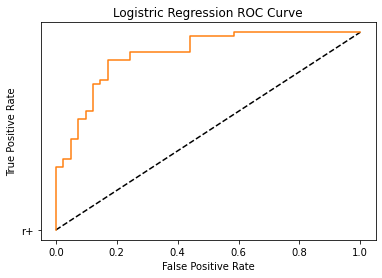

In [18]:
logistic_model =LogisticRegression(max_iter = 1000)
logistic_model.fit(x_train, y_train)
train_predictions = logistic_model.predict(x_train)
test_predictions = logistic_model.predict(x_test)
model_performance = pd.DataFrame([[ 'Logistic Regression', 
                                    round(accuracy_score(y_train, train_predictions)*100,2),
                                    round(accuracy_score(y_test, test_predictions)*100,2)]],
                                   columns = ['Model', 'Train_Accuracy', 'Test_Accuracy'])
print(model_performance)

# Plotting the ROC Curve
fpr,tpr,threshols=roc_curve(y_test,logistic_model.predict_proba(x_test)[:,1])
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()                                        